Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Load Dataset

In [ ]:
df = pd.read_csv('listings.csv')

Understanding and Cleaning Data

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,816783428767938211,Cool studio 3 min from subway!,47125955,Rebeca,Queens,Long Island City,40.761327,-73.926758,Entire home/apt,110.0,30,9,2023-09-25,0.96,2,363,9,NaN
1,8686040,LARGE MANHATTAN ONE BEDROOM,45608786,Virginia,Manhattan,Inwood,40.859990,-73.928500,Entire home/apt,NaN,30,5,2015-11-22,0.05,1,0,0,NaN
2,12426778,TH BRKLYN,7963317,Rob,Brooklyn,Boerum Hill,40.688340,-73.986010,Private room,NaN,30,0,NaN,NaN,1,0,0,NaN
3,22671517,55 washington,3428456,Yoon,Brooklyn,DUMBO,40.701490,-73.988860,Private room,NaN,30,0,NaN,NaN,1,0,0,NaN
4,35776956,luxury apt in long lsland city \n1min to subway,221012726,Lyn,Queens,Long Island City,40.749010,-73.938980,Private room,NaN,30,1,2019-07-31,0.02,1,0,0,NaN


In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,3.931900e+04,3.931900e+04,39319.000000,39319.000000,24277.000000,39319.000000,39319.000000,27514.000000,39319.000000,39319.000000,39319.000000
mean,3.354009e+17,1.628209e+08,40.729172,-73.946640,205.272892,29.367125,24.918106,0.927277,48.610468,146.682418,5.365447
std,4.272047e+17,1.757040e+08,0.056337,0.054622,993.318776,28.814873,58.654299,1.683886,151.570957,144.589719,16.561050
min,2.595000e+03,1.678000e+03,40.500314,-74.251907,8.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.042637e+07,1.692691e+07,40.688880,-73.983120,80.000000,30.000000,0.000000,0.100000,1.000000,0.000000,0.000000
50%,4.731606e+07,8.081323e+07,40.726368,-73.954370,130.000000,30.000000,4.000000,0.340000,1.000000,95.000000,0.000000
75%,7.920235e+17,2.934481e+08,40.762650,-73.927380,217.000000,30.000000,21.000000,1.240000,7.000000,288.000000,4.000000
max,1.106684e+18,5.657054e+08,40.911380,-73.713650,100000.000000,1250.000000,1897.000000,86.030000,842.000000,365.000000,1034.000000


In [ ]:
df.shape

(39319, 18)

In [ ]:
df.isnull().sum()

id                                    0
name                                  2
host_id                               0
host_name                             6
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                             15042
minimum_nights                        0
number_of_reviews                     0
last_review                       11805
reviews_per_month                 11805
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           34212
dtype: int64

In [ ]:
df.drop(columns=["name", "last_review", "host_id", "id", "host_name","license"], inplace=True)

In [ ]:
fill_cols_with_zero = ['longitude', 'room_type', 'minimum_nights', 'number_of_reviews',
                       'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']
df[fill_cols_with_zero] = df[fill_cols_with_zero].fillna(0)

df['price'].fillna(df['price'].mean(), inplace=True)
df['reviews_per_month'].fillna(df['reviews_per_month'].mean(), inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39161 entries, 0 to 39318
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             39161 non-null  object 
 1   neighbourhood                   39161 non-null  object 
 2   latitude                        39161 non-null  float64
 3   longitude                       39161 non-null  float64
 4   room_type                       39161 non-null  object 
 5   price                           39161 non-null  float64
 6   minimum_nights                  39161 non-null  int64  
 7   number_of_reviews               39161 non-null  int64  
 8   reviews_per_month               39161 non-null  float64
 9   calculated_host_listings_count  39161 non-null  int64  
 10  availability_365                39161 non-null  int64  
 11  number_of_reviews_ltm           39161 non-null  int64  
dtypes: float64(4), int64(5), object(3)
me

In [ ]:
df.duplicated().sum()

df.drop_duplicates(inplace=True)


Data Analysis and Visualization

Distribution of different room types

In [ ]:
room_df = df.room_type.value_counts()

room_df

room_type
Entire home/apt    20667
Private room       17672
Shared room          555
Hotel room           267
Name: count, dtype: int64

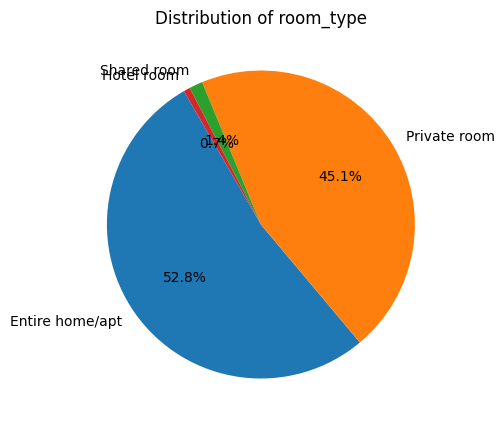

In [ ]:
plt.figure(figsize = (10, 5))
plt.pie(room_df.values, labels = room_df.index, autopct='%1.1f%%',  startangle = 120)
plt.title("Distribution of room_type")
plt.show()

Rooms available in different neighborhoods

In [ ]:
df[['neighbourhood_group','availability_365']].sort_values(by = "neighbourhood_group", ascending = False)

,neighbourhood_group,availability_365
18269,Staten Island,283
7473,Staten Island,87
36534,Staten Island,0
1780,Staten Island,365
29351,Staten Island,0
...,...,...
4760,Bronx,0
32649,Bronx,1
986,Bronx,365
987,Bronx,90


In [ ]:
df.groupby('neighbourhood_group')['availability_365'].sum()

neighbourhood_group
Bronx             261668
Brooklyn         1876610
Manhattan        2566885
Queens            949327
Staten Island      80088
Name: availability_365, dtype: int64

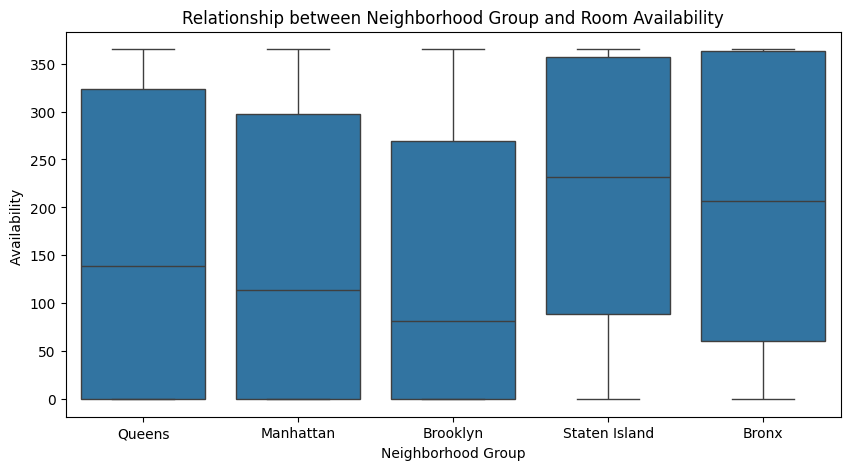

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='neighbourhood_group', y='availability_365')
plt.title("Relationship between Neighborhood Group and Room Availability")
plt.xlabel("Neighborhood Group")
plt.ylabel("Availability ")
plt.show()

Average number of nights spend in different room types

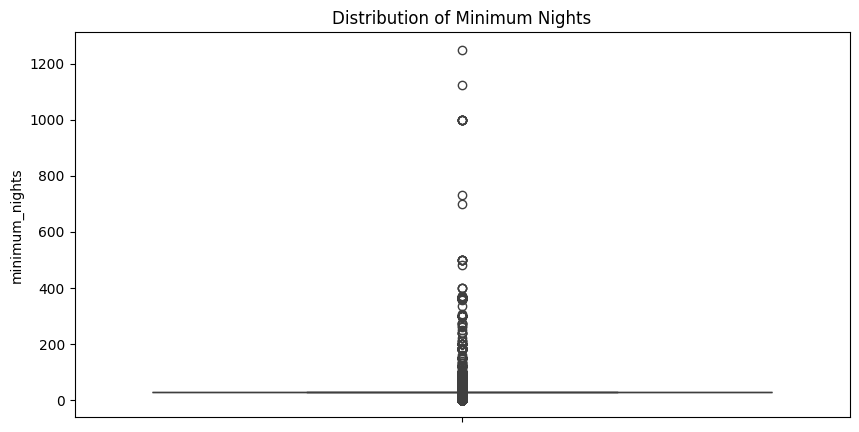

In [ ]:
plt.figure(figsize = (10,5))

sns.boxplot(y = df["minimum_nights"])

plt.title("Distribution of Minimum Nights")
plt.show()

In [ ]:
night_df = df.groupby('room_type')['minimum_nights'].mean()

night_df

room_type
Entire home/apt    30.548120
Hotel room          6.018727
Private room       28.415120
Shared room        30.068468
Name: minimum_nights, dtype: float64

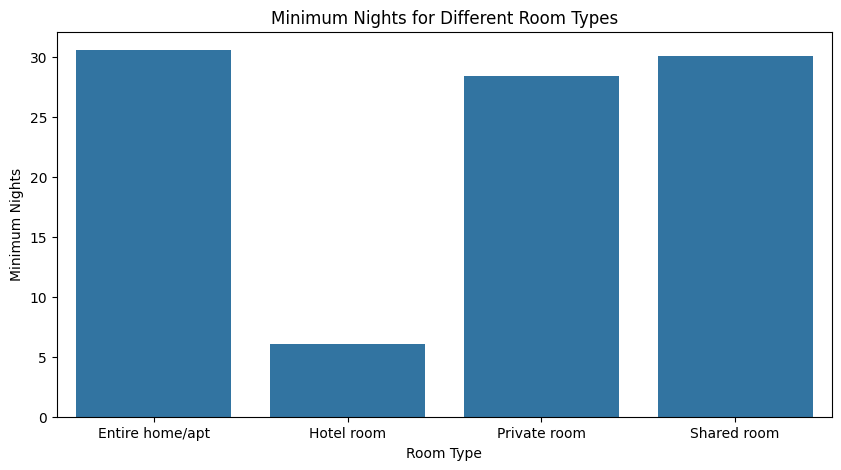

In [ ]:
plt.figure(figsize = (10, 5))
sns.barplot(x = night_df.index, y = night_df.values)
plt.title("Minimum Nights for Different Room Types")
plt.xlabel("Room Type")
plt.ylabel("Minimum Nights")
plt.show()

Correlation Between Price and Number of Reviews

In [ ]:
df[['number_of_reviews', 'price']]

,number_of_reviews,price
0,9,110.000000
1,5,205.272892
2,0,205.272892
3,0,205.272892
4,1,205.272892
...,...,...
39314,3,205.272892
39315,4,205.272892
39316,24,205.272892
39317,2,205.272892


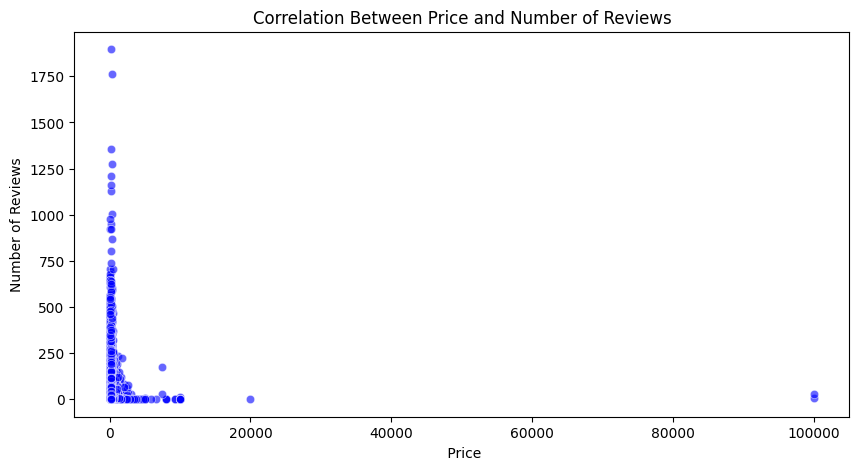

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='price', y='number_of_reviews', data=df, alpha=0.6, color='blue')
plt.title('Correlation Between Price and Number of Reviews')
plt.xlabel(' Price')
plt.ylabel('Number of Reviews')
plt.show()

Average Prices by Neighborhood Group

In [ ]:
neighborhoodGroup_price_mean = df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)

print(neighborhoodGroup_price_mean)


neighbourhood_group
Manhattan        238.355254
Brooklyn         193.321045
Queens           149.466088
Bronx            139.898032
Staten Island    138.575062
Name: price, dtype: float64


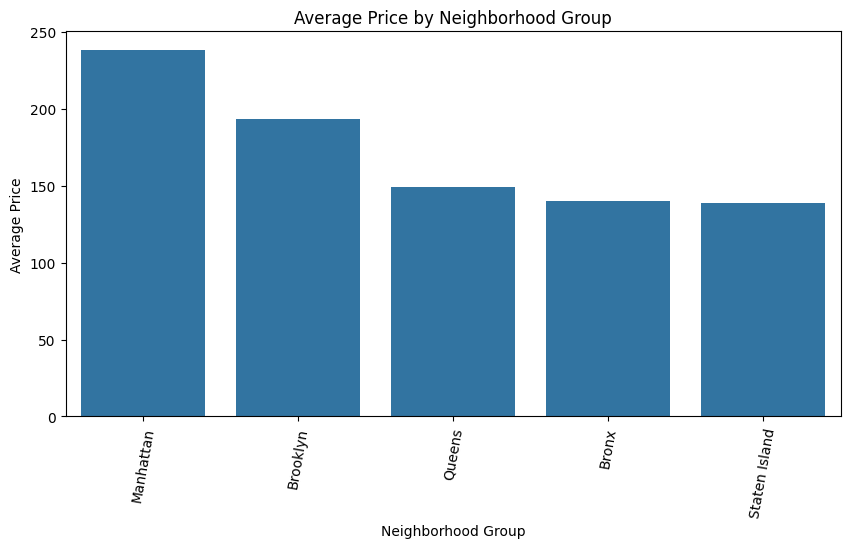

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x=neighborhoodGroup_price_mean.index, y=neighborhoodGroup_price_mean.values)
plt.title('Average Price by Neighborhood Group')
plt.xlabel('Neighborhood Group')
plt.ylabel('Average Price')
plt.xticks(rotation=80)
plt.show()

Correlation between Variables

In [ ]:
num_column = df.select_dtypes(exclude = object)
corr = num_column.corr()
corr

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
latitude,1.000000,0.051396,0.003044,-0.006616,-0.051600,-0.034427,0.034639,0.004928,-0.040326
longitude,0.051396,1.000000,-0.041479,0.016876,0.045111,0.050366,-0.084532,0.083119,0.057550
price,0.003044,-0.041479,1.000000,-0.015327,-0.014424,-0.004940,0.006506,0.015889,-0.009972
minimum_nights,-0.006616,0.016876,-0.015327,1.000000,-0.067102,-0.118507,0.036750,-0.024050,-0.105229
number_of_reviews,-0.051600,0.045111,-0.014424,-0.067102,1.000000,0.633630,-0.121371,0.048532,0.619372
reviews_per_month,-0.034427,0.050366,-0.004940,-0.118507,0.633630,1.000000,-0.028638,0.086827,0.837585
calculated_host_listings_count,0.034639,-0.084532,0.006506,0.036750,-0.121371,-0.028638,1.000000,0.093428,-0.089425
availability_365,0.004928,0.083119,0.015889,-0.024050,0.048532,0.086827,0.093428,1.000000,0.063274
number_of_reviews_ltm,-0.040326,0.057550,-0.009972,-0.105229,0.619372,0.837585,-0.089425,0.063274,1.000000


<Axes: >

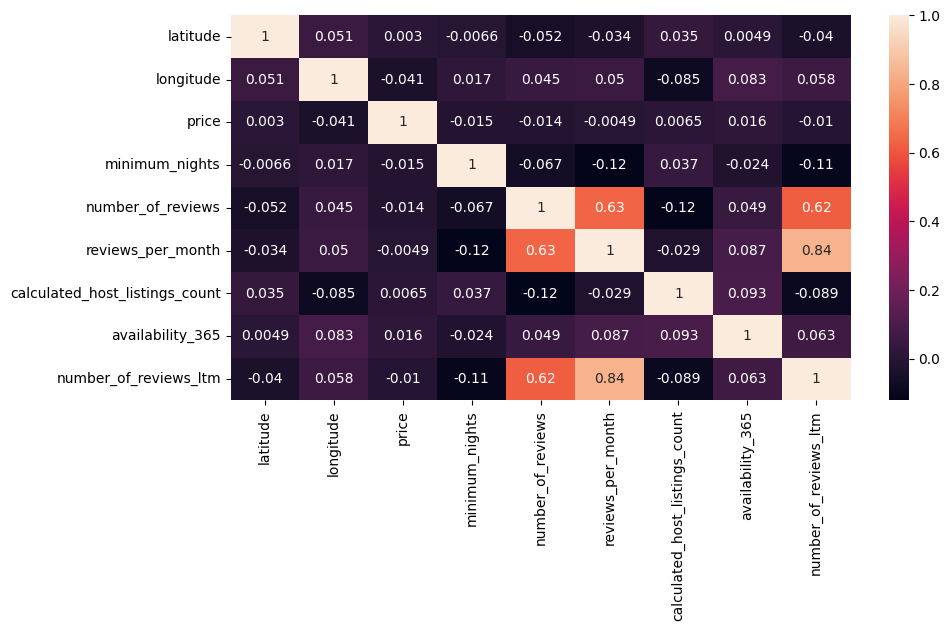

In [ ]:
plt.figure(figsize=(10,5))

sns.heatmap(corr, annot=True)